# Self-fulfilling Debt Dilution in Discrete Time

The setup follows Aguiar and Amador (19), [Self-fulfilling Debt Dilution: Maturity and Multiplicity in Debt Models](http://amadormanuel.me/files/self_fulfilling_dilution.pdf), but in discrete time and with concave utility. 

Time is discrete. The government's utility is denoted by $u$. The government borrows using a long-duration exponential bond with decay rate $1 - \delta$. The bonds pay a coupon of $(r + \delta)$ every period, so tht the risk free price is $1$. 

The government's default outside option takes on two values (high and low). At the beginning of every period, there is a probability $\lambda$ that the outside option is high. This realization is i.i.d. We denote by $\overline V$, the high outside option; and by $\underline V$, the low one. 

Conditional on no default today, the value to a government that enters the period with $b$ bonds is:
$$
    V(b) = u(c) + \beta \lambda \max\{V(b'), \overline V\} + 
    \beta (1 - \lambda) \max \{ V(b'), \underline V\} 
$$
subject to:
$$
    y + q(b') (b' - (1 - \delta) b) = c + (r + \delta) b
$$
We let $B(b)$ denote the debt policy function associated with this problem. 

We impose that when indifferent, the country repays. So, default is then given by:
$$
    D(b, V_D) = \begin{cases}
      0 &, \text{ if } V(b) \ge V_D \\ 
      1 &, \text{ otherwise }  
    \end{cases}
$$

The ex-ante probability of default is then 
$$
    D(b) = \lambda D(b, \overline V) + (1-\lambda) D(b, \underline V)
$$

Conditional on no default today, and an amount $b$ of bonds issued, the price of a bond is:
$$
    q(b) = (1 - D(b)) \left[
      \frac{  (r + \delta) + (1 - \delta) q (B(b)) }
      { 1 + r}
    \right]
$$

A Markov equilibrium is defined as a value function $V$, a price function $q$, a debt policy function $B$, and a default function $D$, such that the above equations are all satisfied. 

We use the code in "two_states_long_bond_jl" to

(i) construct the borrowing, savings, and hybrid equilibrium; 

(ii) confirm with value iteration that they are indeed equilibria; and 

(iii) analyze whether iterating backwards from a final T converges to a particular type of equilibria. 


## Code

In [1]:
using ProgressMeter
using LaTeXStrings

In [2]:
include("two_states_long_bond.jl");

In [3]:
m = TwoStatesModel(β=0.92, τH=0.08, τL=0.04)

R=1.05 β=0.92 τH=0.08 τL=0.04 λ=0.025 δ=0.25 y=1.0 points=10001

For this parameterization we can construct the three equilibrium objects. 

In [4]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

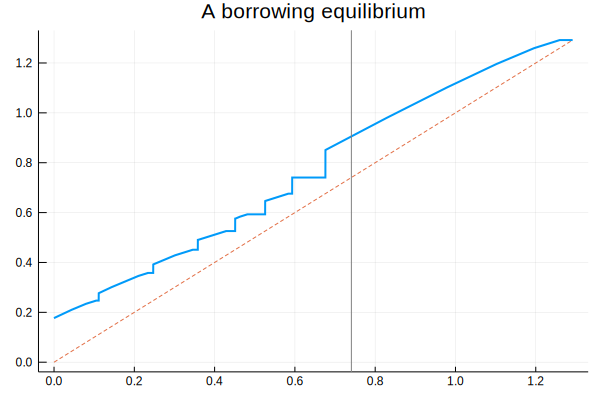

In [5]:
p = plot_pol(bor)
title!(p, "A borrowing equilibrium")

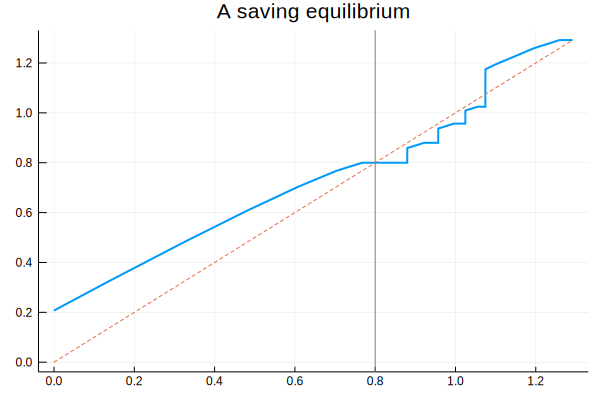

In [6]:
p = plot_pol(sav)
title!(p, "A saving equilibrium")

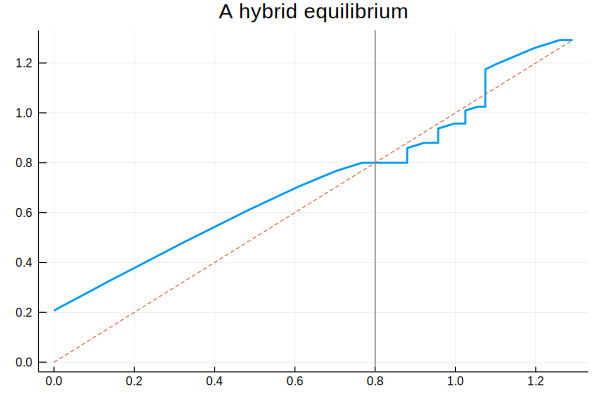

In [7]:
plot_pol(hyb)
title!(p, "A hybrid equilibrium")

### Checking the accuracy of the constructed equiilbria

The following checks whether the construction are indeed equilibria. It does so by iterating the value and policies functions once. 

In [8]:
a_tmp = Alloc(m);

In [9]:
for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

0.0
0.0
3.1760058018526216e-6


The savings and the borrowing are indeed equilibria. 
The hybrid does not seem to be an equilibrium in discrete time for this parameterization. 

### Iterating backwards from a finite T

Let's explore what happens if we iterate backwards from a finite T.

Iter 10. Distance=0.044317926477945746
Iter 20. Distance=0.9254762551022705
Iter 30. Distance=0.9220322459398178
Iter 40. Distance=0.9197545884299237
Iter 50. Distance=0.9186492418007216
Iter 60. Distance=0.9181271623310924
Iter 70. Distance=0.9178768005740661
Iter 80. Distance=0.9177530646962591
Iter 90. Distance=0.02527927883441583
Iter 100. Distance=0.025171505362276192
Iter 110. Distance=0.019472139551787504
Iter 120. Distance=0.019404996620579817
Iter 130. Distance=0.025037932152295106
Iter 140. Distance=0.01938688017654655
Iter 150. Distance=1.4672701660389809e-5
Iter 160. Distance=0.019382317454287867
Iter 170. Distance=4.1927808275693534e-6
Iter 180. Distance=0.019381359284414423
Iter 190. Distance=2.101367301693413e-6
Iter 200. Distance=9.128096940536068e-7
Iter 210. Distance=3.965139921263683e-7
Iter 220. Distance=1.7224110024360861e-7
Iter 230. Distance=7.481954539256819e-8
Iter 240. Distance=3.250074681604431e-8
Iter 250. Distance=1.4117949309611078e-8
Iter 260. Distance=6.

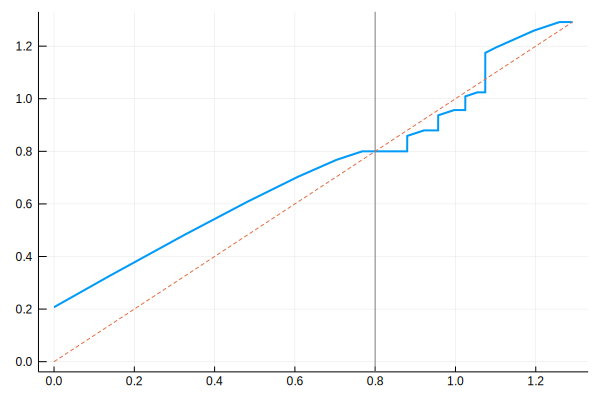

In [10]:
iter_out = iterate_backwards(m)
plot_pol(iter_out)

In this case we have converged to the savings equilibrium.

## Another parameter specification

Now we try a different parameterization.

In [11]:
m = TwoStatesModel(R=1.05, β=0.92, δ=0.10, npoints_approx=20000)

R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

In [12]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

In [13]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7188905394022551
Iter 20. Distance=0.8254565602620448
Iter 30. Distance=0.8506699877924698
Iter 40. Distance=0.8514445259203092
Iter 50. Distance=0.8499299974643371
Iter 60. Distance=0.8488926755481255
Iter 70. Distance=0.8483451083735261
Iter 80. Distance=0.848075741524153
Iter 90. Distance=0.08942684264729162
Iter 100. Distance=0.07457457735176354
Iter 110. Distance=0.07443563715799995
Iter 120. Distance=0.07435554334971928
Iter 130. Distance=0.07430857329420693
Iter 140. Distance=0.0742983523568399
Iter 150. Distance=0.07423094908601868
Iter 160. Distance=0.07424428670539707
Iter 170. Distance=0.0742369909310191
Iter 180. Distance=5.718109168606489e-6
Iter 190. Distance=0.014603794536565129
Iter 200. Distance=2.147450944567364e-6
Iter 210. Distance=9.328278983145033e-7
Iter 220. Distance=4.052096696516294e-7
Iter 230. Distance=1.7601840229808374e-7
Iter 240. Distance=7.64603617642301e-8
Iter 250. Distance=3.321349861806766e-8
Iter 260. Distance=1.442756059066852e

Alloc for model: R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

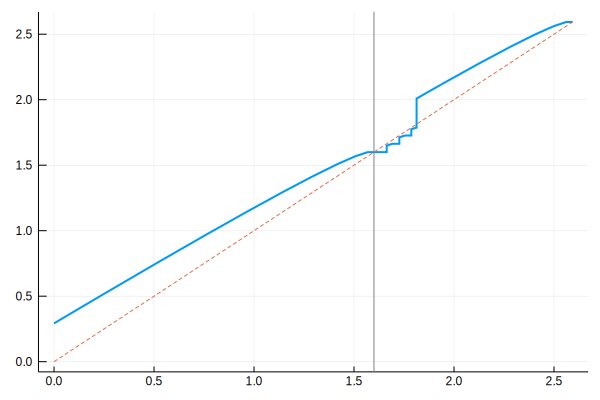

In [14]:
plot_pol(iter_out)

An again we converge to the savings equilibrium. 

#### A note on the hybrid for this specification

In [15]:
m = TwoStatesModel(β=exp(-0.1), R=exp(.06))

bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m)

a_tmp = Alloc(m)

for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


For this parameterization, the hybrid seems to be an equilibrium. 

## A Case when Only Borrowing is an Equilibrium

In [16]:
m = TwoStatesModel(δ = 0.05)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

In [17]:
bor = create_bor_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

In [18]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

No savings equilibrium in this case

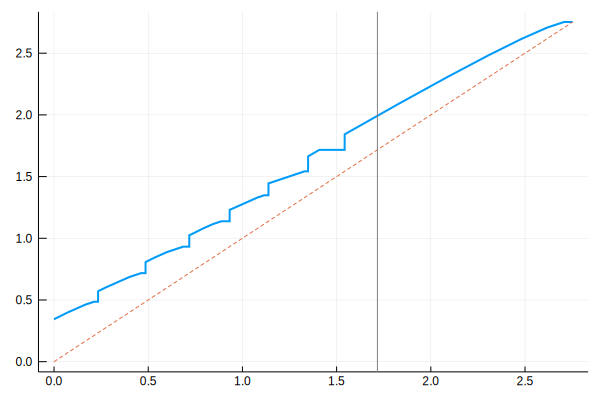

In [19]:
plot_pol(bor)

In [20]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.11034509631709433
Iter 20. Distance=0.7133846439036589
Iter 30. Distance=0.7709612210767033
Iter 40. Distance=0.7854403566635458
Iter 50. Distance=0.7883303409676565
Iter 60. Distance=0.7885507735204019
Iter 70. Distance=0.7883293618878485
Iter 80. Distance=0.7881311766387402
Iter 90. Distance=0.020312050369326484
Iter 100. Distance=0.015029098103021998
Iter 110. Distance=0.7879062697166926
Iter 120. Distance=0.010067383123863821
Iter 130. Distance=9.495765986855531e-6
Iter 140. Distance=0.011123749558848928
Iter 150. Distance=1.0404147313125556e-6
Iter 160. Distance=3.1500990166355436e-7
Iter 170. Distance=9.536831679923807e-8
Iter 180. Distance=2.887011057994826e-8
Iter 190. Distance=8.73895100728106e-9
Iter 200. Distance=2.6450787671272735e-9
Iter 210. Distance=8.005499596563936e-10
Iter 220. Distance=2.4227625461392677e-10
Iter 230. Distance=7.331768525631333e-11
Iter 240. Distance=2.2185586701084503e-11
Iter 250. Distance=6.713518629908322e-12
Iter 260. Distanc

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

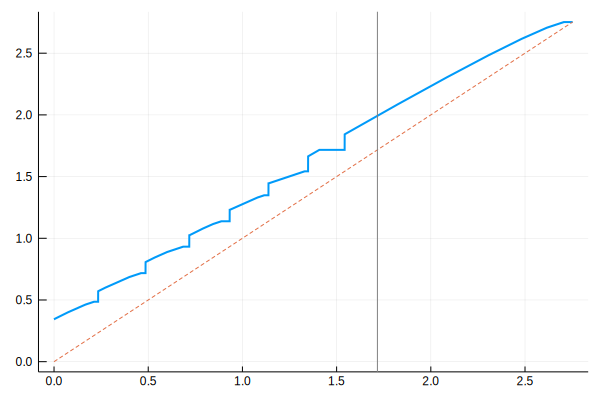

In [21]:
plot_pol(iter_out)

Iterating backwards converges to the borrowing equilibrium. 

## A Case where Only Saving is an Equilibrium

In [22]:
m = TwoStatesModel(δ = 0.4)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

In [23]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

In [24]:
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

There is no borrowing equilibrium for this parameterization.

In [25]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.9876108076939502
Iter 20. Distance=0.9688301846913887
Iter 30. Distance=0.955535308763793
Iter 40. Distance=0.9492477998423364
Iter 50. Distance=0.9462592128425412
Iter 60. Distance=0.9448397187943605
Iter 70. Distance=0.9441678564166195
Iter 80. Distance=0.9438459280658781
Iter 90. Distance=0.9436836312022735
Iter 100. Distance=0.02542420108344723
Iter 110. Distance=0.02525872280036945
Iter 120. Distance=0.025156666178336895
Iter 130. Distance=0.025095575183952223
Iter 140. Distance=0.025056673817344
Iter 150. Distance=0.0043468571404085
Iter 160. Distance=1.9164925435855018e-5
Iter 170. Distance=1.3778965179844782e-5
Iter 180. Distance=0.004331903667630699
Iter 190. Distance=2.0895099769324688e-6
Iter 200. Distance=6.0438966180687e-6
Iter 210. Distance=2.353590759590629e-6
Iter 220. Distance=0.005439325658002314
Iter 230. Distance=3.5691006639027023e-7
Iter 240. Distance=1.3898653278276996e-7
Iter 250. Distance=5.412359638246045e-8
Iter 260. Distance=2.10766010200

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

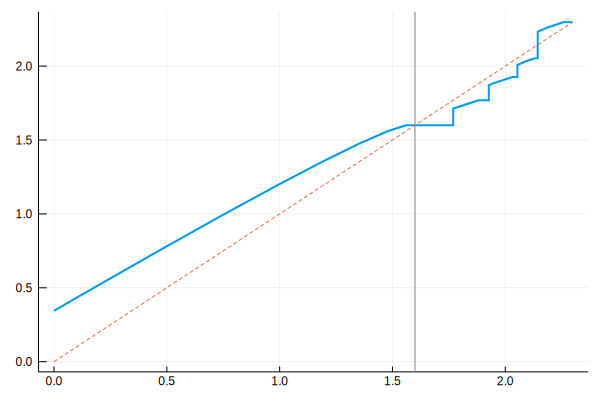

In [26]:
plot_pol(iter_out)

Iterating backwards in this case converges to the savings equilibrium. 

## But sometimes iteration converges to the borrowing eqm when they are multiple ones

Let's increase the maturity -- so now we have multiple equilibria.

In [27]:
m = TwoStatesModel(δ = 0.15)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [28]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7742414540393177
Iter 20. Distance=0.8897494549354081
Iter 30. Distance=0.8917655451835694
Iter 40. Distance=0.8869190168129727
Iter 50. Distance=0.8840704500000645
Iter 60. Distance=0.8826477784535244
Iter 70. Distance=0.8819713163679502
Iter 80. Distance=0.8816461058169568
Iter 90. Distance=0.8814956545891218
Iter 100. Distance=0.02265007445869871
Iter 110. Distance=0.007924462095842244
Iter 120. Distance=0.004232003097927983
Iter 130. Distance=8.430924612445878e-6
Iter 140. Distance=0.005209418307864158
Iter 150. Distance=9.435359290543843e-7
Iter 160. Distance=2.8524531692220023e-7
Iter 170. Distance=8.623401437368727e-8
Iter 180. Distance=2.60698591603159e-8
Iter 190. Distance=7.88131654383406e-9
Iter 200. Distance=2.3826422501649347e-9
Iter 210. Distance=7.203092566854252e-10
Iter 220. Distance=2.1776064285106145e-10
Iter 230. Distance=6.583256162429052e-11
Iter 240. Distance=1.9902246517489175e-11
Iter 250. Distance=6.016853681956036e-12
Iter 260. Distance=1.

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

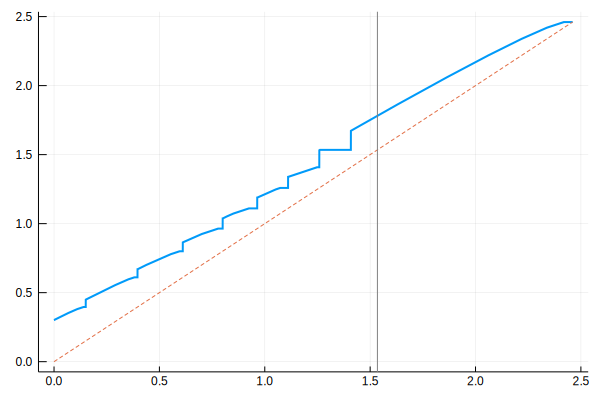

In [29]:
plot_pol(iter_out)

Iterating backwards converges to the borrowing equilibrium in this example.

But savings is also an equilibrium .. 

In [30]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [31]:
a_tmp = Alloc(m);
iterate_v_and_pol!(a_tmp, sav);
println("Error in allocation:", maximum(abs.(sav.v .- sav.v)))

Error in allocation:0.0


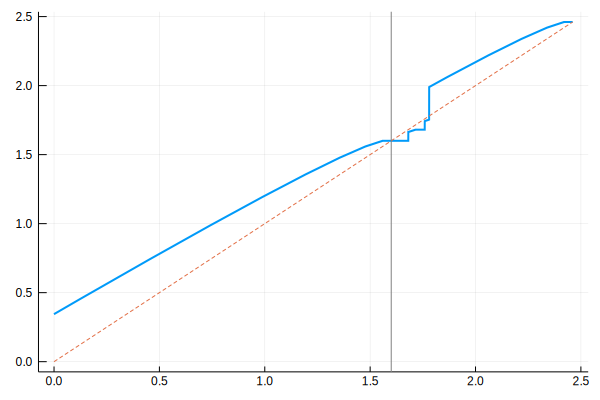

In [32]:
plot_pol(sav)

So there is no clear pattern to which equilibria one converges starting from a finite horizon.

## Converging to the hybrid when the hybrid is the only one

Now we show that is the hybrid equilibrium is the only one, backward iteration converges to it. 

In [33]:
m = TwoStatesModel(δ = 0.012, λ = 0.05, β=0.93)
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

In [34]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

In this case, neither the saving nor the borrowing allocations are equilibrium

In [35]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.12911985758541217
Iter 20. Distance=0.06006644779185749
Iter 30. Distance=0.18032767105478886
Iter 40. Distance=0.3377497627702888
Iter 50. Distance=0.39387320971524176
Iter 60. Distance=0.4159425819095246
Iter 70. Distance=0.4284278797763431
Iter 80. Distance=0.43530682516099106
Iter 90. Distance=0.43906158740412116
Iter 100. Distance=0.4409924991455364
Iter 110. Distance=0.4420664426233022
Iter 120. Distance=0.442768946555296
Iter 130. Distance=8.88688094030643e-5
Iter 140. Distance=6.221206990852934e-5
Iter 150. Distance=4.402006691595073e-5
Iter 160. Distance=2.756724882879702e-5
Iter 170. Distance=1.8870233126633273e-5
Iter 180. Distance=1.5177744349892386e-5
Iter 190. Distance=7.290007493554462e-6
Iter 200. Distance=8.815023981312287e-6
Iter 210. Distance=4.24981991076212e-6
Iter 220. Distance=2.0478623645736604e-6
Iter 230. Distance=9.86245727530033e-7
Iter 240. Distance=4.746684251211164e-7
Iter 250. Distance=2.2828542245445504e-7
Iter 260. Distance=1.096995

Alloc for model: R=1.05 β=0.93 τH=0.15 τL=0.08 λ=0.05 δ=0.012 y=1.0 points=10001

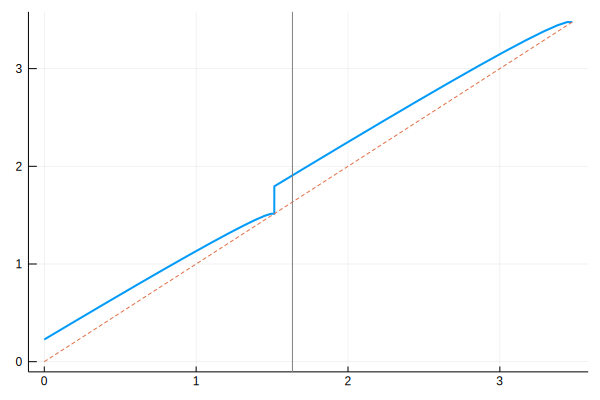

In [36]:
plot_pol(iter_out)

In [37]:
hyb = create_hyb_eqm(m)

Alloc for model: R=1.05 β=0.93 τH=0.15 τL=0.08 λ=0.05 δ=0.012 y=1.0 points=10001

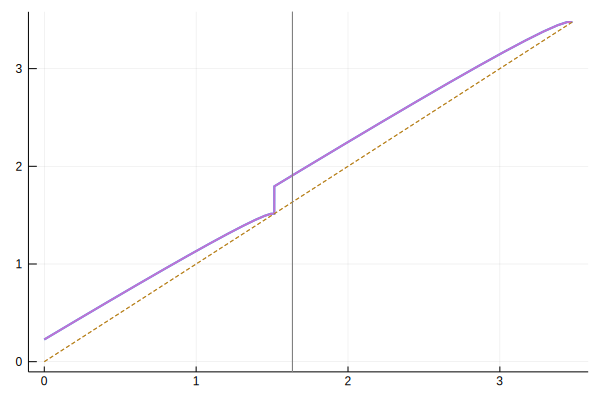

In [38]:
p = plot_pol(hyb)
plot_pol(iter_out, new_figure=false, base_plot=p)

Iterating backwards converges to the hybrid. Which is indeed an equilibrium:

In [39]:
a_tmp = Alloc(m)
iterate_v_and_pol!(a_tmp, hyb)
maximum(abs.(a_tmp.v .- hyb.v))

4.440892098500626e-16

## Parameter map with multiplicity

Now, we are going to identify the region in the space of default cost and maturities where we have multiplicity. 

*THIS TAKES TIME TO COMPUTE*. 

In [40]:
TwoStatesModel()

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.25 y=1.0 points=10001

In [ ]:
mulQ = Dict{Tuple{Float64, Float64}, Tuple{Bool, Bool}}()
@showprogress for δ in range(0.0, stop=0.5, length=50)
    for τL in range(0.01, stop=0.08, length=50)
        borQ = true
        savQ = true
        m = TwoStatesModel(δ=δ, τL=τL, τH=0.08)
        try
            bor = create_bor_eqm(m)
        catch
            borQ = false
        end
        try
            sav = create_sav_eqm(m)
        catch
            savQ = false
        end
        mulQ[(δ, τL)] = (borQ, savQ)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:43:11


In [ ]:
multeqm = [[x[1], x[2]] for x in keys(mulQ) if mulQ[x]==(true, true)]
multeqm = reduce(hcat, multeqm); # array of arrays into a matrix

Doing a plot with the multiplicity region

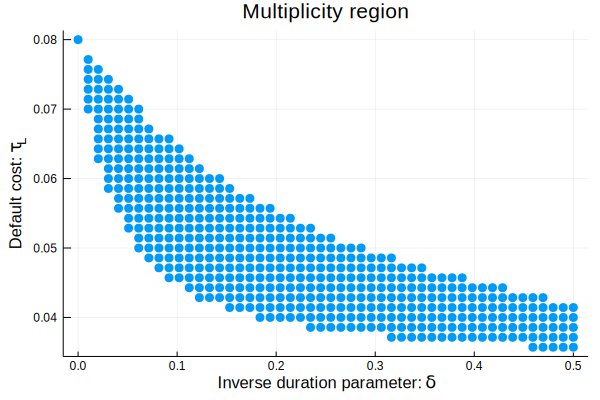

In [ ]:
p = scatter(multeqm[1, :], multeqm[2, :], 
    markerstrokecolor="white", markersize=5,
    xlabel="Inverse duration parameter: \\delta", 
    ylabel="Default cost: \\tau_{L}",
    title="Multiplicity region", 
    leg=false
)

In [ ]:
savefig(p, "multiplicity_region.pdf")